In [2]:
!pip install fastbook
!pip install fastai

!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 24.1 MB/s eta 0:00:0000:0100:01
Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.5.5 OK


In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [6]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [7]:
# from duckduckgo_search import ddg_images
from duckduckgo_search import DDGS
from fastcore.all import *

ddgs = DDGS()

def search_images(term, max_images=150):
    print(f"Searching for '{term}'")
#     return L(ddg_images(term, max_results=max_images)).itemgot('image')
    return L(ddgs.images(keywords=term, max_results=max_images)).itemgot('image')

In [8]:
results = search_images('cillian murphy')
# print(results)
# ims = results.attrgot('contentUrl') - not needed, because search_images returns urls themselves
ims = results 
len(ims)

Searching for 'cillian murphy'


150

['https://media.cntraveller.com/photos/611be8c7d5b6f5a4a3def118/master/w_1600,c_limit/cillian-murphy-conde-nast-traveller-27oct14-rex_b.jpg', 'https://cdn.mos.cms.futurecdn.net/8Qn3YrzdScEQaKsvYaX4o9-970-80.jpg', 'https://actorsareidiots.com/wp-content/uploads/2020/06/CillianMurphy.jpg', 'https://i.pinimg.com/originals/a6/fd/f7/a6fdf74df4434cecf4c020e79c02d936.jpg', 'https://i.redd.it/evw9hnci0p341.jpg', 'https://netstorage-legit.akamaized.net/images/e2ec5bc61aafb928.jpg', 'https://i.pinimg.com/originals/2b/58/49/2b5849dd44135eb73689149290abcf42.jpg', 'https://bifa.imgix.net/web/2018/10/440px-Cillian_Murphy_2010.jpg?auto=compress,format&fit=scale&h=3065&ixlib=php-3.3.1&w=1600&wpsize=xl', 'https://media.gq-magazine.co.uk/photos/5d139db92881cc00400a8972/master/w_2048,c_limit/Cillian-Murphy-02-GQ-12Oct17_John-Balsom_b.jpg', 'https://zoomboola.com/images/catalog/2022/3/cillian-murphy_28.jpg', 'https://static.independent.co.uk/s3fs-public/thumbnails/image/2019/04/01/09/cillian-murphy.jpg', 

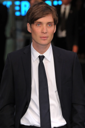

In [9]:

print(ims)
dest = 'images/cillian.jpg'
download_url(ims[0], dest)
     

im = Image.open(dest)
im.to_thumb(128,128)
     


In [10]:
celebrity_types = 'cillian murphy','bradley cooper','mario'
path = Path('celebrities')

In [11]:
if not path.exists():
    path.mkdir()
    for o in celebrity_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(o)
        download_images(dest, urls=results)

Searching for 'cillian murphy'
Searching for 'bradley cooper'
Searching for 'mario'


In [12]:
fns = get_image_files(path)
fns

(#418) [Path('celebrities/mario/6b758ed3-50ce-4715-9b93-5bfa84336778.jpg'),Path('celebrities/mario/4143f041-46a4-4816-a70d-cd65d94681b6.jpg'),Path('celebrities/mario/ceba76c6-fdb8-45db-bbb2-16b6b425d7ea.png'),Path('celebrities/mario/bd6ba84c-f78b-4848-bf44-19295b3e03ec.jpg'),Path('celebrities/mario/b49cefb2-7ea2-4f66-8564-4d7ab8ed8a29.jpg'),Path('celebrities/mario/6d20f30b-22f6-4931-8558-9790efe1f210.jpg'),Path('celebrities/mario/ad680e17-4205-41c5-9690-48f6eb14796e.jpg'),Path('celebrities/mario/c6256ca4-e67b-4e75-a787-570617e391a2.jpg'),Path('celebrities/mario/5f15a49d-aaf0-4448-bc9c-16b032bf3412.jpg'),Path('celebrities/mario/b8e8a9cf-cee5-4211-bbad-a88dbf9d812b.png')...]

In [13]:
failed = verify_images(fns)
failed

(#8) [Path('celebrities/mario/334bb6ab-17ac-4bf9-9c0e-b3d81fc552af.jpg'),Path('celebrities/bradley cooper/f0b5e965-5671-4d55-ac39-68308f0c3081.jpg'),Path('celebrities/bradley cooper/1f943212-c07e-434a-af11-045e2fcbf215.jpg'),Path('celebrities/bradley cooper/40307d51-5eb8-4bff-996d-65b284729be9.jpg'),Path('celebrities/cillian murphy/9b4f3c5a-282e-4bb7-b4f5-d8994b0aa94b.jpg'),Path('celebrities/cillian murphy/bb6d518e-5045-4877-9cd6-2c5fbd5e9be6.jpg'),Path('celebrities/cillian murphy/6d369279-37fb-4c13-8218-04cdc9ba3bc5.jpg'),Path('celebrities/cillian murphy/827e54ab-5c69-4255-b52f-8fcf5b564cc4.jpg')]

In [14]:
failed.map(Path.unlink);

In [15]:
celebrities = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = celebrities.dataloaders(path)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


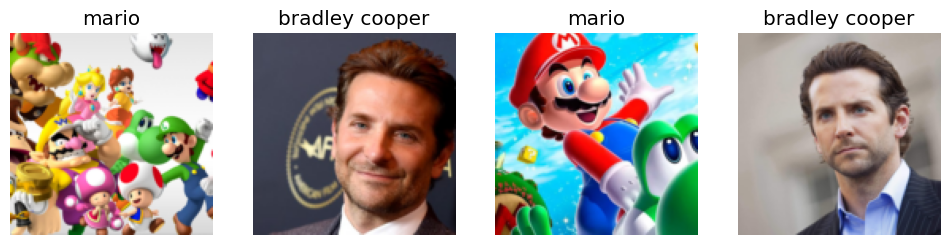

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

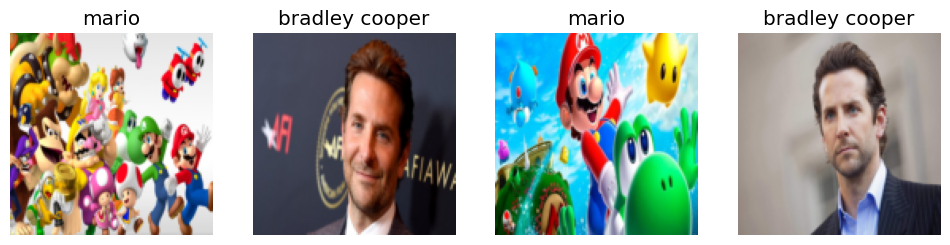

In [18]:
celebrities = celebrities.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = celebrities.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


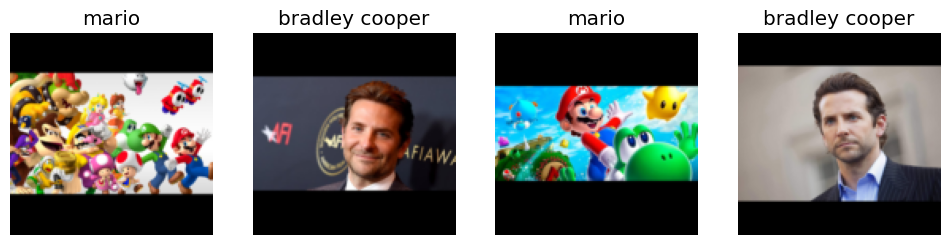

In [19]:
celebrities = celebrities.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = celebrities.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

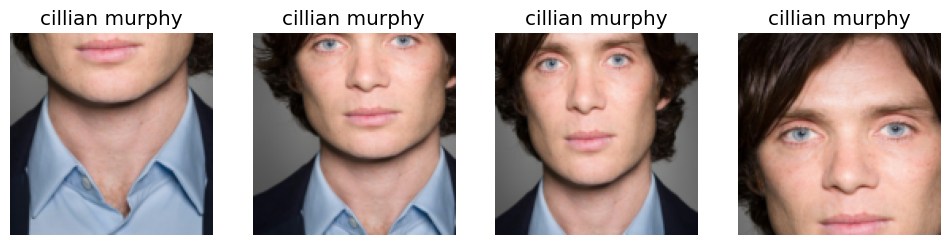

In [20]:
celebrities = celebrities.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = celebrities.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

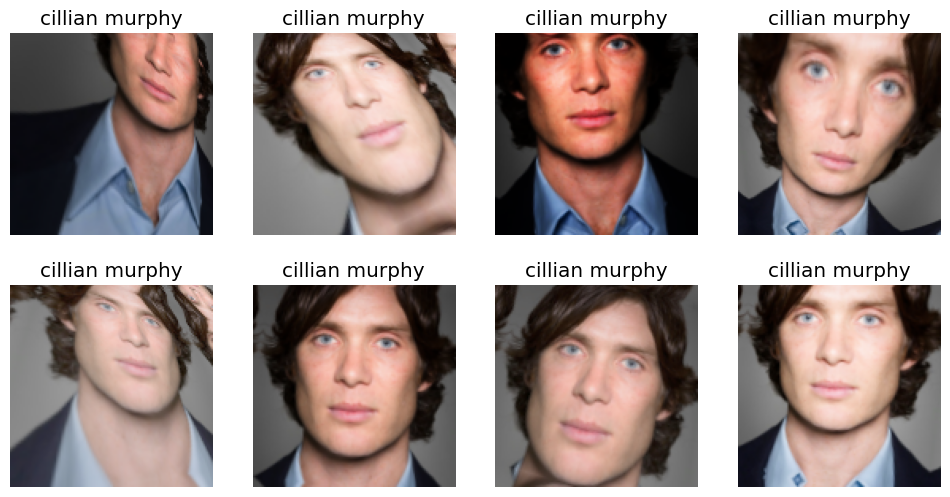

In [21]:
celebrities = celebrities.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = celebrities.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [22]:
celebrities = celebrities.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = celebrities.dataloaders(path)


In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.333619,0.567200,0.256098,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.468407,0.285381,0.146341,00:11
1,0.398727,0.158956,0.060976,00:11
2,0.303321,0.108665,0.048780,00:12
3,0.233364,0.113097,0.036585,00:12


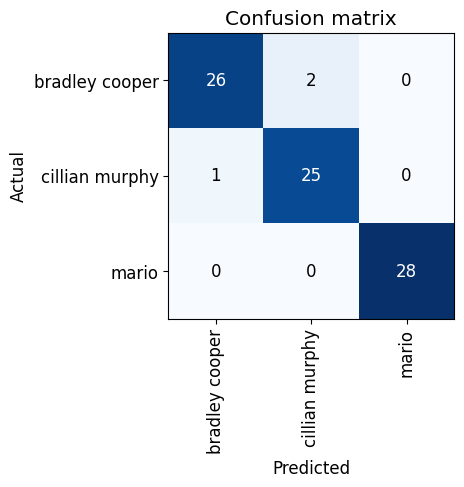

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

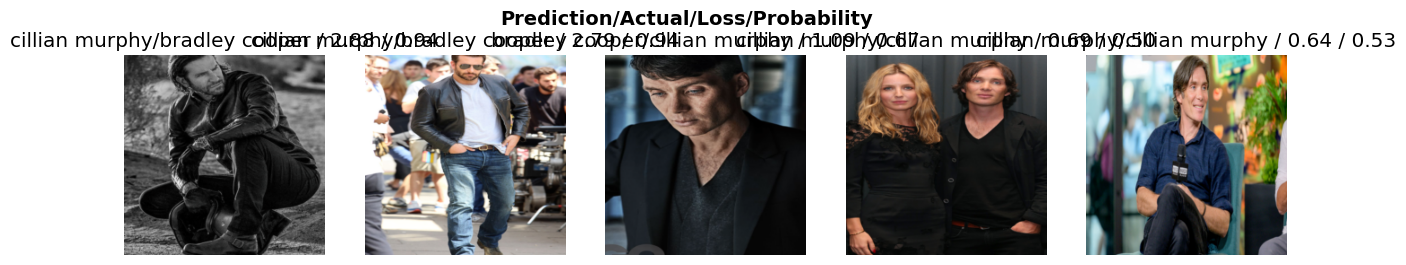

In [25]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:

path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/cillian murphy.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'images/grizzly.jpg'

In [ ]:
learn_inf.dls.vocab

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your celebrity!'), 
      btn_upload, btn_run, out_pl, lbl_pred])